In [1]:
import numpy as np
from numpy import random
from numba import jit
import matplotlib.pyplot as plt
import math 
import pandas as pd
import scienceplots
plt.style.use(['science','notebook','ieee'])

@jit(nopython=True)
def get_initial_configuration(N):
    # generates a random spin configuration for initial condition
    return 2*np.random.randint(0,2, size=(N,N))-1

@jit(nopython=True)
def monte_carlo_step(config, beta, J=1):
    # Makes a single step of the simulation.
    L = config.shape[0]  # shape of the lattice
    for a in range(L):
        for b in range(L):
            i, j = np.random.randint(0, L, size=2)  # randomly select a no from the array i row and j column
            s = config[i, j]  # store the configuration value -1 or +1 from the position (i and j)
            # This sum includes the spins of the four nearest neighbors: the sites to the right, left, above, and below the selected site
            neighbours = config[(i + 1) % L, j] + config[i, (j + 1) % L] + config[(i - 1) % L, j] + config[i, (j - 1) % L]  # %L is the periodic boundary condition
            dE = 2 * J * neighbours * s  # change in energy, if energy dE negative then flip is accepted

            if dE <= 0:
                s *= -1
            elif random.random() < np.exp(-beta * dE):  # Accept spin flip with prob
                s *= -1

            config[i, j] = s

    return config

@jit(nopython=True)
def compute_magnetization(config):
    return np.sum(config)  # total magnetic moment of the system

@jit(nopython=True)
def compute_energy(config, J=1):
    # function for calculating the energy of the configuration
    L = config.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            s = config[i, j]
            neighbours = config[(i + 1) % L, j] + config[i, (j + 1) % L] + config[(i - 1) % L, j] + config[i, (j - 1) % L]
            dE = -J * neighbours * s
            E += dE  # Total energy of the ising model is calculated
    return E / 4  # normalization factor to account for the double-counting of energy contributions from neighboring spins  




Text(0, 0.5, 'Energy')

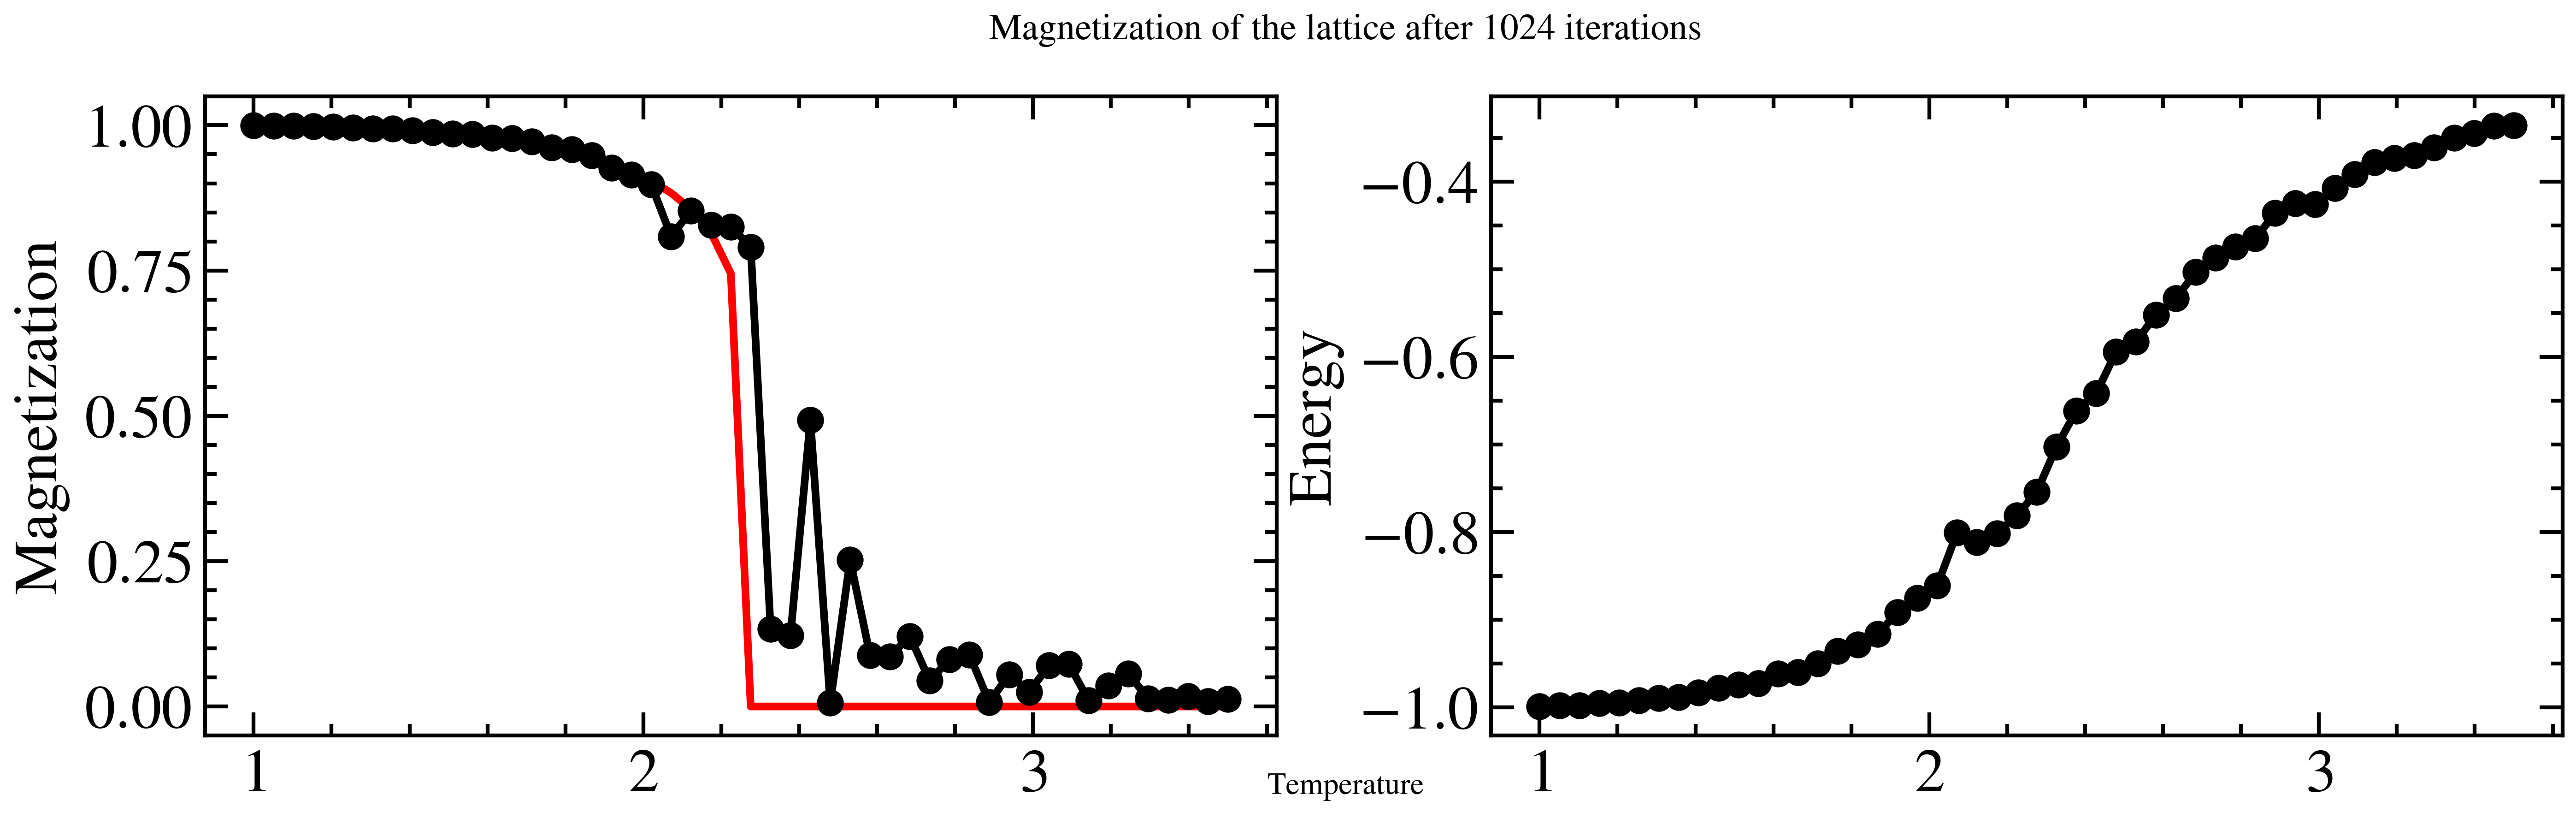

In [2]:
N = 10  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('10_ising_configurations_new.csv', index=False)
df_10=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

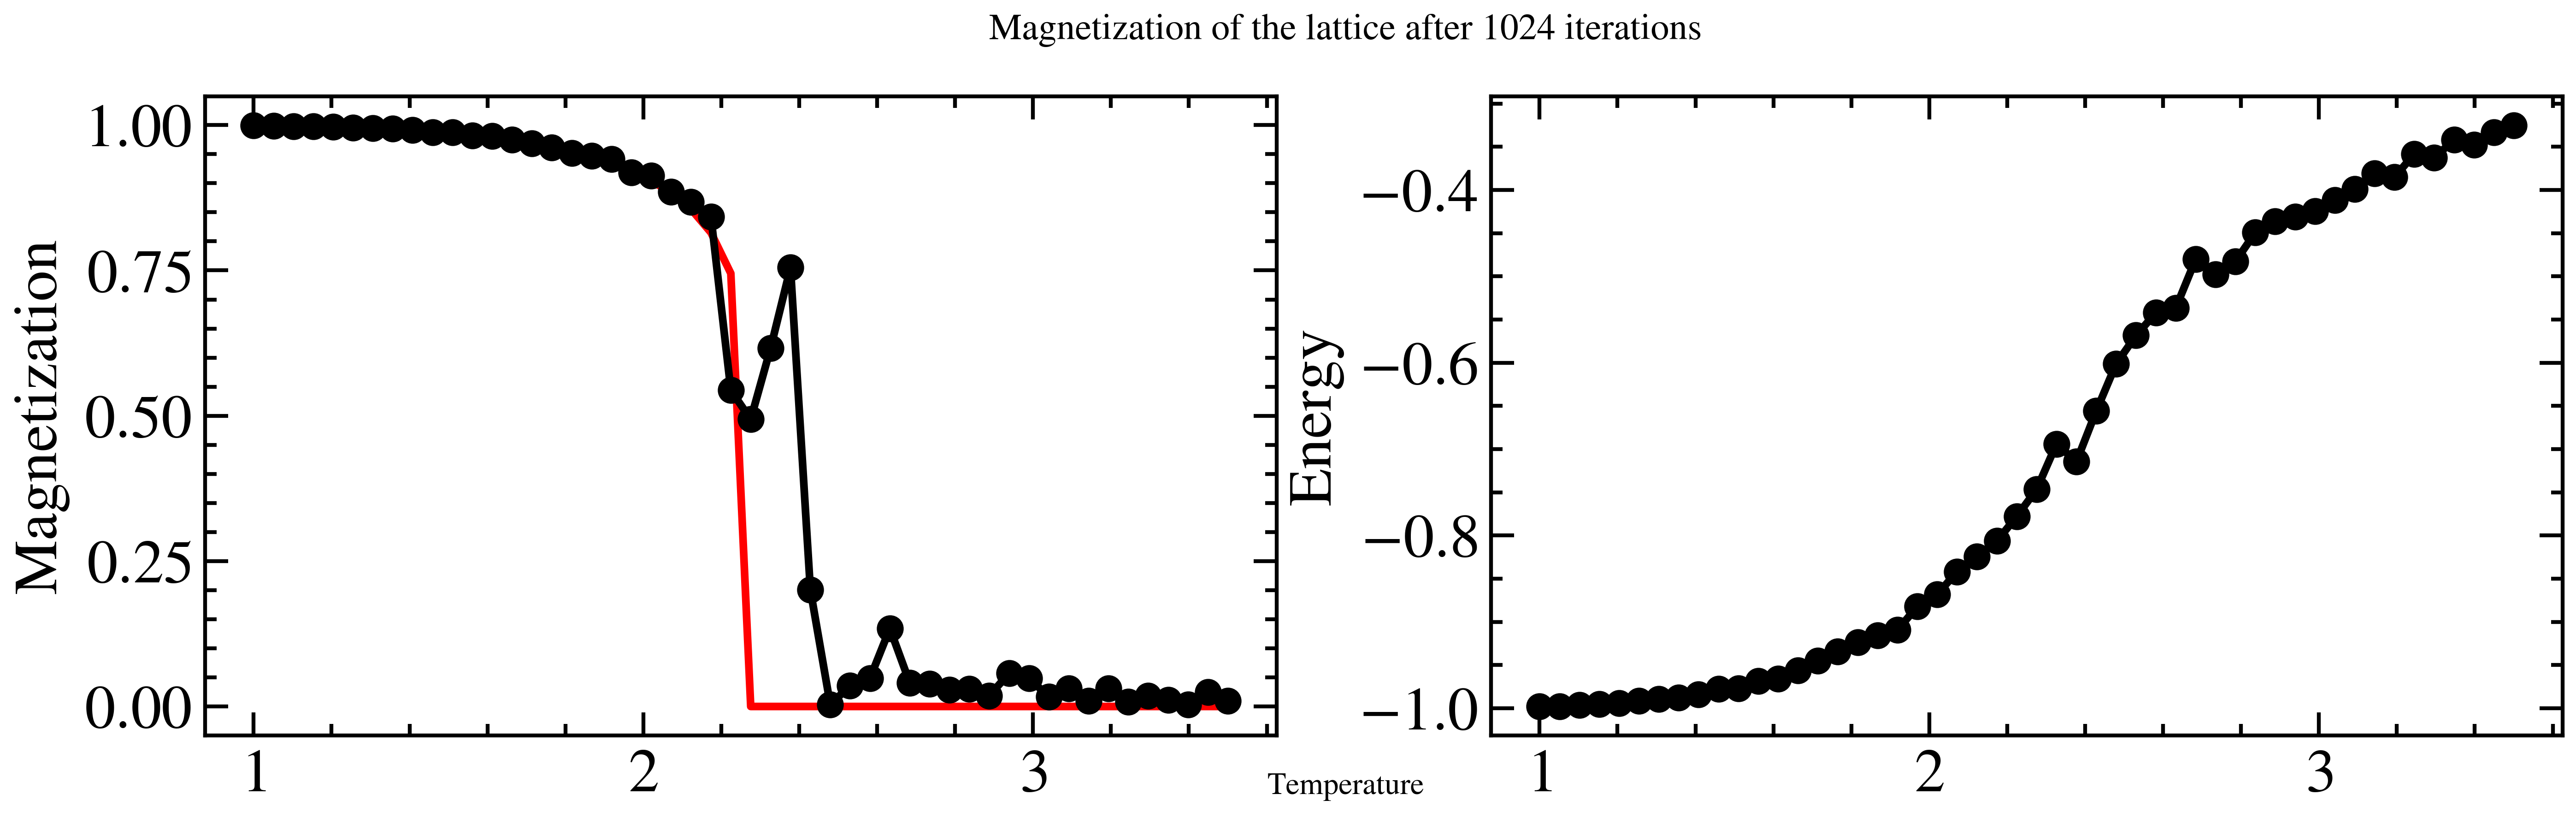

In [3]:
N = 11  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('11_ising_configurations_new.csv', index=False)
df_11=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

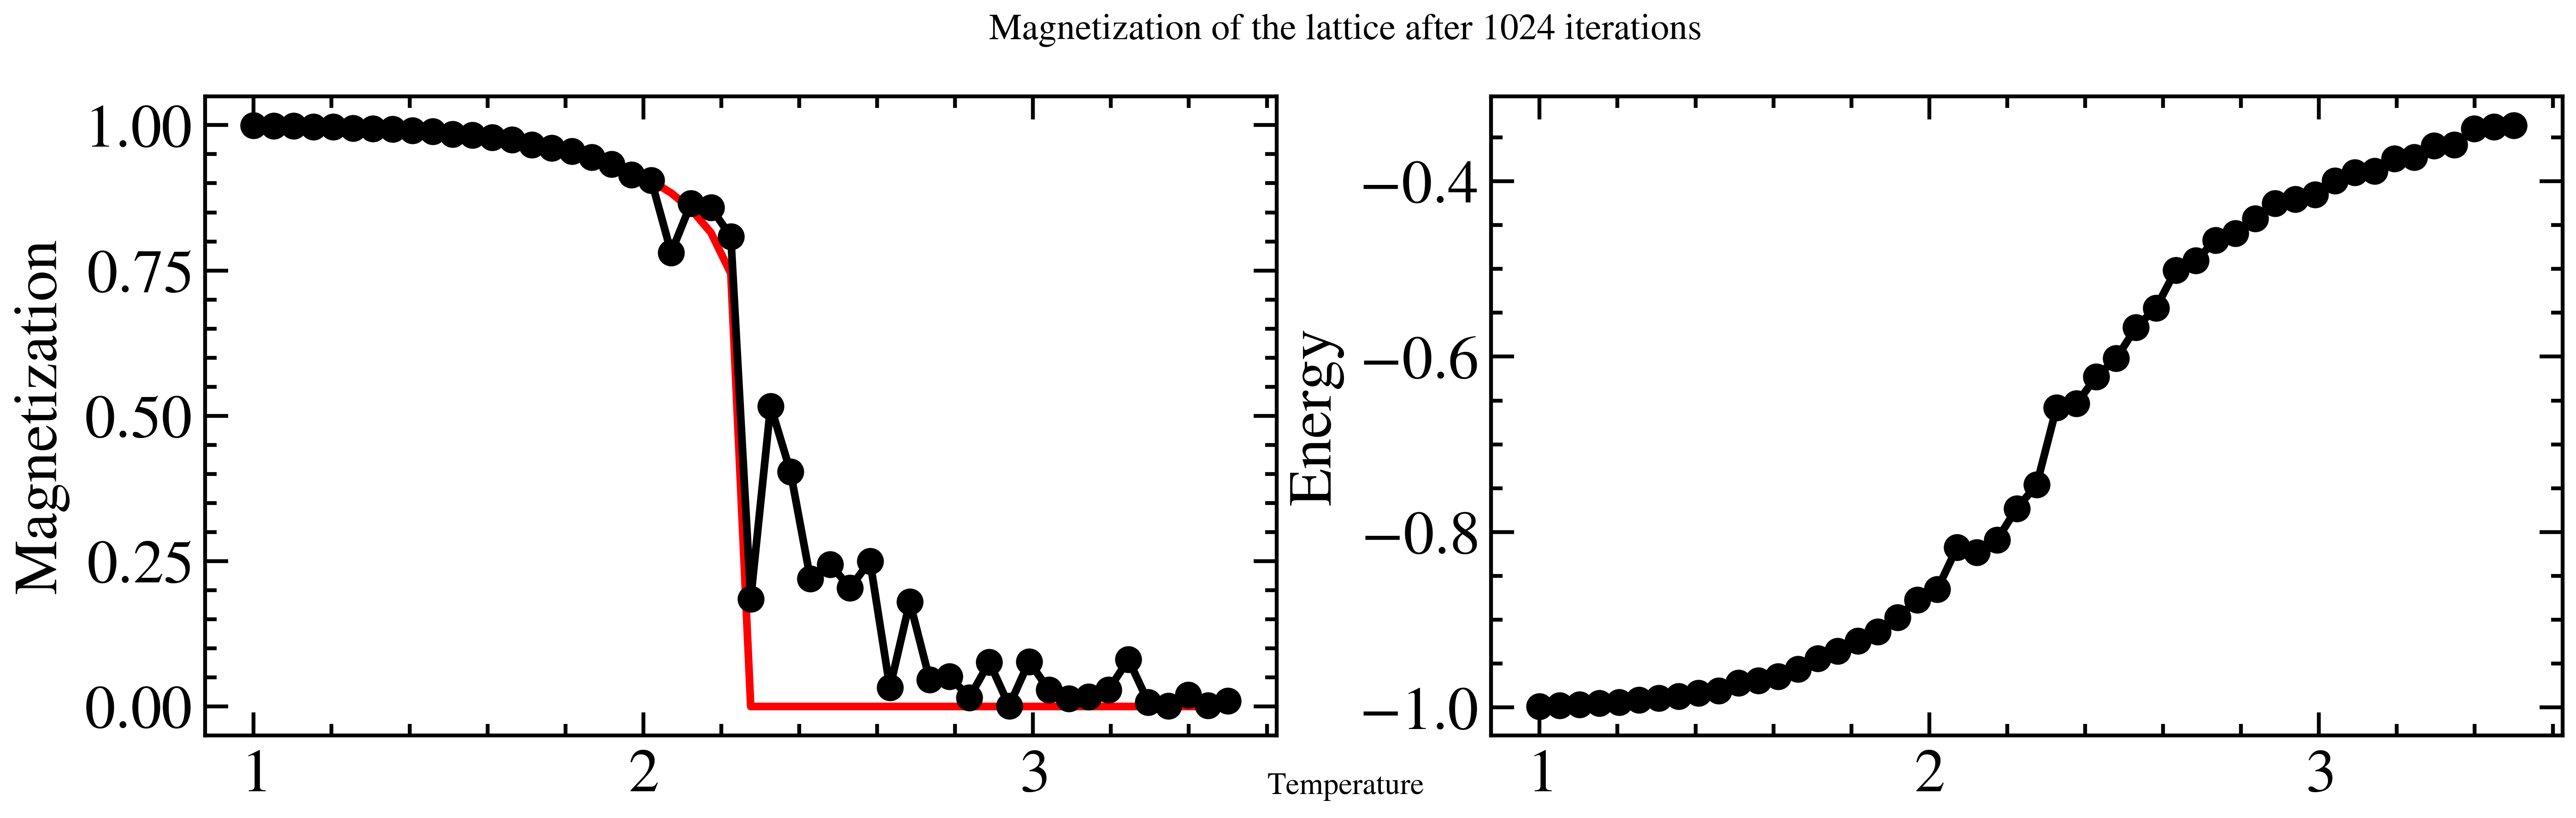

In [4]:
N = 12  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('12_ising_configurations_new.csv', index=False)
df_12=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

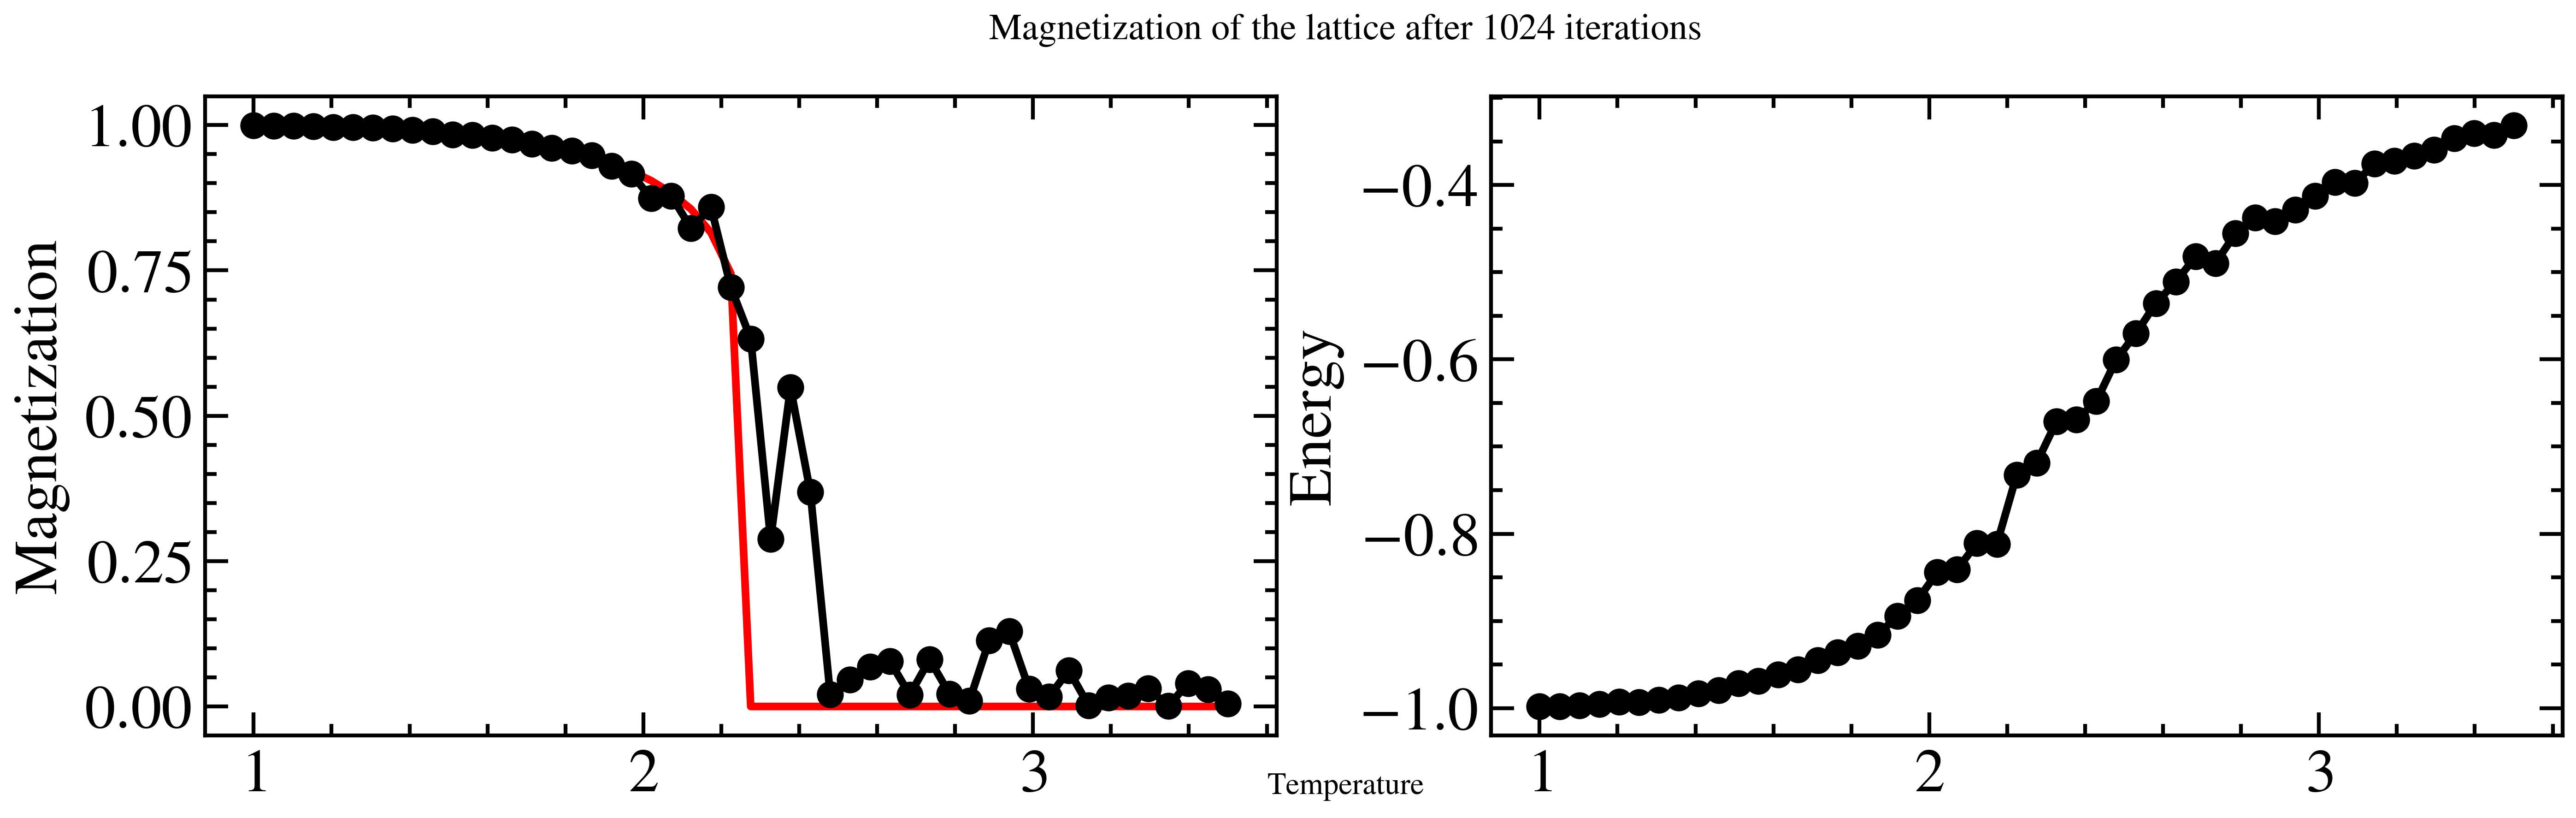

In [5]:
N = 13  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('13_ising_configurations_new.csv', index=False)
df_13=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

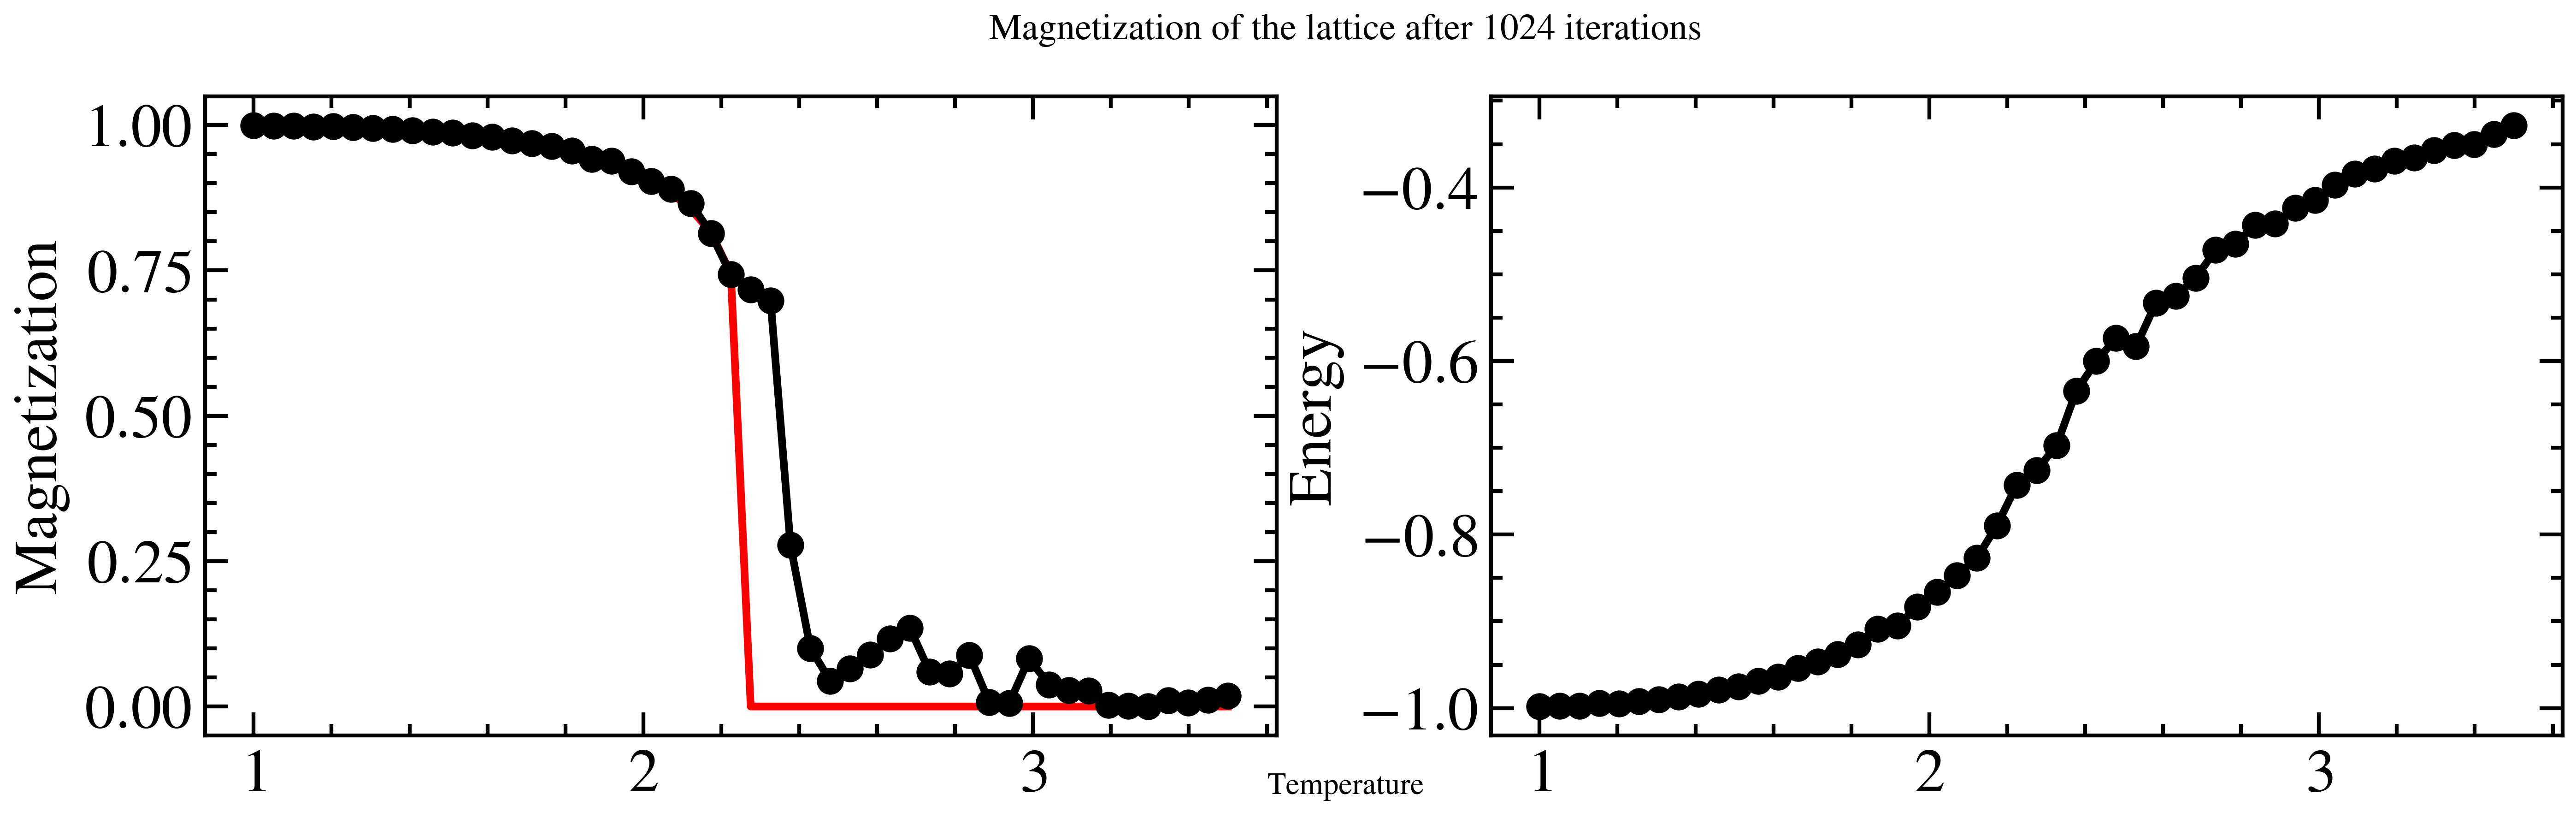

In [6]:
N = 14  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('14_ising_configurations_new.csv', index=False)
df_14=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 15  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('15_ising_configurations_new.csv', index=False)
df_15=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 16  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('16_ising_configurations_new.csv', index=False)
df_16=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 17  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('17_ising_configurations_new.csv', index=False)
df_17=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 18  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('18_ising_configurations_new.csv', index=False)
df_18=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 19  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('19_ising_configurations_new.csv', index=False)
df_19=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
N = 20  # Size of the lattice (NxN)
T = np.linspace(1, 3.5, 50)  # Temperature Array with 50 temperature points
betas = 1 / T  # inverse temperature
M = np.zeros(len(T))
E = np.zeros(len(T))
steps = 1024  # MC step size
# Create an empty list to store spin configurations
configurations = []

for j, beta in enumerate(betas):

    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(steps):  # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state, beta=beta)  # updates the configuration of spins in the system based on the Metropolis algorithm and the given temperature beta.
    for k in range(steps):  # Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state, beta=beta)
        magnetization += compute_magnetization(initial_state)  # magnetization of each configuration is calculated
        energy += compute_energy(initial_state)  # Energy is calculated
        # Append a copy of the current configuration to the list
        configurations.append(np.concatenate((np.copy(initial_state).flatten(), ['Paramagnetic' if beta < 0.442 else 'Ferromagnetic'])))

    

    M[j] = magnetization / steps  # average magnetization 
    E[j] = energy / steps  # average energy

# Convert the list of configurations to a NumPy array
configurations_2d = np.array(configurations)


# Convert the NumPy array to a Pandas DataFrame
columns = [f'Spin_{i+1}' for i in range(N**2)] + ['Phase']
df_configurations = pd.DataFrame(configurations_2d, columns=columns)

# Save the DataFrame to a CSV file
df_configurations.to_csv('20_ising_configurations_new.csv', index=False)
df_20=df_configurations
# Analytical magnetisation
def analytical_magnetization(T):
    mag = np.zeros(len(T))  # array with zero
    for i, temp in enumerate(T):
        if temp < 2.26:  # critical temperature (TCrit=2/ln(1+sqrt2) = 2.269) 
            mag[i] = math.pow((1.0 - 1.0 / math.pow(math.sinh(2.0 / temp), 4)), 1 / 8.0)
        else:
            None
    return mag 
#ploting the graph
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# List of configurations (10 to 20)
configurations = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Dictionary to store overall averages for each configuration
overall_averages_dict = {}
Rf_mean_critical_temperatures_dict = {} 
Rf_sd_critical_temperatures_dict ={}
# Lists to store average sums for each model
rf_average_sums_1 = []
rf_average_sums_2 = []
rf_average_sums_3 = []
threshold = 0.5
for config in configurations:
    # Get the training set for the current configuration
    train_indices = list(range(21500)) + list(range(40000, 51200))
    training_set = globals()[f"df_{config}"].iloc[train_indices]

    # Separate features and target variable for training set
    X_train = training_set.iloc[:, 0:config ** 2]  # Assuming columns 0 to config^2 are your features
    y_train = training_set['Phase']

    # Get the testing set for the current configuration
    test_set_1 = pd.read_csv(f'{config}_ising_configurations_new_1.csv')
    test_set_2 = pd.read_csv(f'{config}_ising_configurations_new_2.csv')
    test_set_3 = pd.read_csv(f'{config}_ising_configurations_new_3.csv')
    test_set_4 = pd.read_csv(f'{config}_ising_configurations_new_4.csv')
    test_set_5 = pd.read_csv(f'{config}_ising_configurations_new_5.csv')
    test_set_6 = pd.read_csv(f'{config}_ising_configurations_new_6.csv')
    test_set_7 = pd.read_csv(f'{config}_ising_configurations_new_7.csv')
    test_set_8 = pd.read_csv(f'{config}_ising_configurations_new_8.csv')
    test_set_9 = pd.read_csv(f'{config}_ising_configurations_new_9.csv')
    test_set_10 = pd.read_csv(f'{config}_ising_configurations_new_10.csv')
    
    # Separate features and target variable for testing set
    X_test_1 = test_set_1.iloc[:, 0:config ** 2]
    y_test_1 = test_set_1['Phase']
    X_test_2 = test_set_2.iloc[:, 0:config ** 2]
    y_test_2 = test_set_2['Phase']
    X_test_3 = test_set_3.iloc[:, 0:config ** 2]
    y_test_3 = test_set_3['Phase']
    X_test_4 = test_set_4.iloc[:, 0:config ** 2]
    y_test_4 = test_set_4['Phase']
    X_test_5 = test_set_5.iloc[:, 0:config ** 2]
    y_test_5 = test_set_5['Phase']
    X_test_6 = test_set_6.iloc[:, 0:config ** 2]
    y_test_6 = test_set_6['Phase']
    X_test_7 = test_set_7.iloc[:, 0:config ** 2]
    y_test_7 = test_set_7['Phase']
    X_test_8 = test_set_8.iloc[:, 0:config ** 2]
    y_test_8 = test_set_8['Phase']
    X_test_9 = test_set_9.iloc[:, 0:config ** 2]
    y_test_9 = test_set_9['Phase']
    X_test_10 = test_set_10.iloc[:, 0:config ** 2]
    y_test_10 = test_set_10['Phase']
    
    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing sets
    y_pred_1 = rf_classifier.predict(X_test_1)
    y_pred_2 = rf_classifier.predict(X_test_2)
    y_pred_3 = rf_classifier.predict(X_test_3)
    y_pred_4 = rf_classifier.predict(X_test_4)
    y_pred_5 = rf_classifier.predict(X_test_5)
    y_pred_6 = rf_classifier.predict(X_test_6)
    y_pred_7 = rf_classifier.predict(X_test_7)
    y_pred_8 = rf_classifier.predict(X_test_8)
    y_pred_9 = rf_classifier.predict(X_test_9)
    y_pred_10 = rf_classifier.predict(X_test_10)
   
    # Evaluate the model on the sets
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    report_1 = classification_report(y_test_1, y_pred_1)
    accuracy_2 = accuracy_score(y_test_2, y_pred_2)
    report_2 = classification_report(y_test_2, y_pred_2)
    accuracy_3 = accuracy_score(y_test_3, y_pred_3)
    report_3 = classification_report(y_test_3, y_pred_3)

    # Print the results
    print("Accuracy 1:", accuracy_1)
    print("Classification Report for configuration 1:\n", report_1)

    # Assuming you have three sets of predictions and test data
    df_RF_with_predictions_1 = X_test_1.copy()
    df_RF_with_predictions_1['Predicted_Phase'] = y_pred_1
    df_RF_with_predictions_2 = X_test_2.copy()
    df_RF_with_predictions_2['Predicted_Phase'] = y_pred_2
    df_RF_with_predictions_3 = X_test_3.copy()
    df_RF_with_predictions_3['Predicted_Phase'] = y_pred_3
    df_RF_with_predictions_4 = X_test_1.copy()
    df_RF_with_predictions_4['Predicted_Phase'] = y_pred_4
    df_RF_with_predictions_5 = X_test_2.copy()
    df_RF_with_predictions_5['Predicted_Phase'] = y_pred_5
    df_RF_with_predictions_6 = X_test_3.copy()
    df_RF_with_predictions_6['Predicted_Phase'] = y_pred_6
    df_RF_with_predictions_7 = X_test_1.copy()
    df_RF_with_predictions_7['Predicted_Phase'] = y_pred_7
    df_RF_with_predictions_8 = X_test_2.copy()
    df_RF_with_predictions_8['Predicted_Phase'] = y_pred_8
    df_RF_with_predictions_9 = X_test_3.copy()
    df_RF_with_predictions_9['Predicted_Phase'] = y_pred_9
    df_RF_with_predictions_10 = X_test_1.copy()
    df_RF_with_predictions_10['Predicted_Phase'] = y_pred_10
   
    # Create a list to store the DataFrames
    dfs = [df_RF_with_predictions_1, df_RF_with_predictions_2, df_RF_with_predictions_3,df_RF_with_predictions_4,df_RF_with_predictions_5,df_RF_with_predictions_6,df_RF_with_predictions_7,df_RF_with_predictions_8,df_RF_with_predictions_9,df_RF_with_predictions_10]

    for i, df_RF_with_predictions in enumerate(dfs, start=1):
        # Create a new column 'Fraction' and initialize it with zeros
        df_RF_with_predictions['Fraction'] = 0

        # Update the 'Fraction' column for rows where 'Predicted_Phase' is 'Ferromagnetic'
        df_RF_with_predictions.loc[df_RF_with_predictions['Predicted_Phase'] == 'Ferromagnetic', 'Fraction'] = df_RF_with_predictions.iloc[:, :-2].sum(axis=1)

        # Divide each sum by 
        df_RF_with_predictions['Fraction'] = df_RF_with_predictions['Fraction'] /df_RF_with_predictions.iloc[:, :-2].shape[1]

    rf_average_sums_1 = []  # List to store average sums for Model 1
    rf_average_sums_2 = []  # List to store average sums for Model 2
    rf_average_sums_3 = []  # List to store average sums for Model 3

    # List to store overall averages
    averages = []
    rf_average_sums=[]
    # Loop through the DataFrames in blocks of 1024 rows
    for df_RF_with_predictions in dfs:
        average_sums = []  # List to store average sums for the current model

        # Loop through the DataFrame in blocks of 1024 rows
        for i in range(0, len(df_RF_with_predictions), 1024):
            # Calculate the sum of the 'Fraction' column for the current block
            block_sum = df_RF_with_predictions['Fraction'].iloc[i:i + 1024].abs().sum()
            # Calculate the average sum for the current block
            average_sum = block_sum / 1024  # Divide by the number of rows in each block
            # Append the average sum to the list
            average_sums.append(average_sum)
            
        rf_average_sums.append(average_sums)  
              
        # Append the average sums for the current model to the respective lists
        #if df_RF_with_predictions is df_RF_with_predictions_1:
            #rf_average_sums_1 = average_sums
        #elif df_RF_with_predictions is df_RF_with_predictions_2:
            #rf_average_sums_2 = average_sums
        #elif df_RF_with_predictions is df_RF_with_predictions_3:
            #rf_average_sums_3 = average_sums
            
    #avg=[rf_average_sums_1,rf_average_sums_2,rf_average_sums_3]
    critical_temperature=[]
    C_temperature=[]
    for avg_sum in rf_average_sums:
        index_of_threshold = next(i for i, fraction in enumerate(avg_sum) if fraction <= threshold)
        critical_temperature = T[index_of_threshold]
        C_temperature.append(critical_temperature)
        
    Rf_mean_critical_temperatures_dict[config] = np.mean(C_temperature) 
    Rf_sd_critical_temperatures_dict[config]=np.std(C_temperature)
  


In [ ]:
for config, C_temperature in Rf_mean_critical_temperatures_dict.items():
    critical_temperatures_mean_rf = np.array(list(Rf_mean_critical_temperatures_dict.values()))
    
for config, C_temperature in Rf_sd_critical_temperatures_dict.items():   
    critical_temperature_sd_rf = np.array(list(Rf_sd_critical_temperatures_dict.values()))

print("Critical Temperatures Mean for Random Forest:", critical_temperatures_mean_rf)
print("Standard Deviation for Random Forest:", critical_temperature_sd_rf)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# List of configurations (10 to 20)
configurations = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Dictionary to store overall averages for each configuration
overall_averages_dict = {}
DT_mean_critical_temperatures_dict = {} 
DT_sd_critical_temperatures_dict ={}
# Lists to store average sums for each model
DT_average_sums_1 = []
DT_average_sums_2 = []
DT_average_sums_3 = []
threshold = 0.5
for config in configurations:
    # Get the training set for the current configuration
    train_indices = list(range(21500)) + list(range(40000, 51200))
    training_set = globals()[f"df_{config}"].iloc[train_indices]

    # Separate features and target variable for training set
    X_train = training_set.iloc[:, 0:config ** 2]  # Assuming columns 0 to config^2 are your features
    y_train = training_set['Phase']

    # Get the testing set for the current configuration
    test_set_1 = pd.read_csv(f'{config}_ising_configurations_new_1.csv')
    test_set_2 = pd.read_csv(f'{config}_ising_configurations_new_2.csv')
    test_set_3 = pd.read_csv(f'{config}_ising_configurations_new_3.csv')
    test_set_4 = pd.read_csv(f'{config}_ising_configurations_new_4.csv')
    test_set_5 = pd.read_csv(f'{config}_ising_configurations_new_5.csv')
    test_set_6 = pd.read_csv(f'{config}_ising_configurations_new_6.csv')
    test_set_7 = pd.read_csv(f'{config}_ising_configurations_new_7.csv')
    test_set_8 = pd.read_csv(f'{config}_ising_configurations_new_8.csv')
    test_set_9 = pd.read_csv(f'{config}_ising_configurations_new_9.csv')
    test_set_10 = pd.read_csv(f'{config}_ising_configurations_new_10.csv')
    
    # Separate features and target variable for testing set
    X_test_1 = test_set_1.iloc[:, 0:config ** 2]
    y_test_1 = test_set_1['Phase']
    X_test_2 = test_set_2.iloc[:, 0:config ** 2]
    y_test_2 = test_set_2['Phase']
    X_test_3 = test_set_3.iloc[:, 0:config ** 2]
    y_test_3 = test_set_3['Phase']
    X_test_4 = test_set_4.iloc[:, 0:config ** 2]
    y_test_4 = test_set_4['Phase']
    X_test_5 = test_set_5.iloc[:, 0:config ** 2]
    y_test_5 = test_set_5['Phase']
    X_test_6 = test_set_6.iloc[:, 0:config ** 2]
    y_test_6 = test_set_6['Phase']
    X_test_7 = test_set_7.iloc[:, 0:config ** 2]
    y_test_7 = test_set_7['Phase']
    X_test_8 = test_set_8.iloc[:, 0:config ** 2]
    y_test_8 = test_set_8['Phase']
    X_test_9 = test_set_9.iloc[:, 0:config ** 2]
    y_test_9 = test_set_9['Phase']
    X_test_10 = test_set_10.iloc[:, 0:config ** 2]
    y_test_10 = test_set_10['Phase']
    
    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the testing sets
    y_pred_1 = dt_classifier.predict(X_test_1)
    y_pred_2 = dt_classifier.predict(X_test_2)
    y_pred_3 = dt_classifier.predict(X_test_3)
    y_pred_4 = dt_classifier.predict(X_test_4)
    y_pred_5 = dt_classifier.predict(X_test_5)
    y_pred_6 = dt_classifier.predict(X_test_6)
    y_pred_7 = dt_classifier.predict(X_test_7)
    y_pred_8 = dt_classifier.predict(X_test_8)
    y_pred_9 = dt_classifier.predict(X_test_9)
    y_pred_10 = dt_classifier.predict(X_test_10)
    

    # Evaluate the model on the sets
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    report_1 = classification_report(y_test_1, y_pred_1)
    accuracy_2 = accuracy_score(y_test_2, y_pred_2)
    report_2 = classification_report(y_test_2, y_pred_2)
    accuracy_3 = accuracy_score(y_test_3, y_pred_3)
    report_3 = classification_report(y_test_3, y_pred_3)
    
     # Print the results
    print("Accuracy 1:", accuracy_1)
    print("Classification Report for configuration 1:\n", report_1)

    # Assuming you have three sets of predictions and test data
    df_DT_with_predictions_1 = X_test_1.copy()
    df_DT_with_predictions_1['Predicted_Phase'] = y_pred_1
    df_DT_with_predictions_2 = X_test_2.copy()
    df_DT_with_predictions_2['Predicted_Phase'] = y_pred_2
    df_DT_with_predictions_3 = X_test_3.copy()
    df_DT_with_predictions_3['Predicted_Phase'] = y_pred_3
    df_DT_with_predictions_4 = X_test_4.copy()
    df_DT_with_predictions_4['Predicted_Phase'] = y_pred_4
    df_DT_with_predictions_5 = X_test_5.copy()
    df_DT_with_predictions_5['Predicted_Phase'] = y_pred_5
    df_DT_with_predictions_6 = X_test_6.copy()
    df_DT_with_predictions_6['Predicted_Phase'] = y_pred_6
    df_DT_with_predictions_7 = X_test_7.copy()
    df_DT_with_predictions_7['Predicted_Phase'] = y_pred_7
    df_DT_with_predictions_8 = X_test_8.copy()
    df_DT_with_predictions_8['Predicted_Phase'] = y_pred_8
    df_DT_with_predictions_9 = X_test_9.copy()
    df_DT_with_predictions_9['Predicted_Phase'] = y_pred_9
    df_DT_with_predictions_10 = X_test_10.copy()
    df_DT_with_predictions_10['Predicted_Phase'] = y_pred_10

    # Create a list to store the DataFrames
    dfs = [df_DT_with_predictions_1, df_DT_with_predictions_2, df_DT_with_predictions_3, df_DT_with_predictions_4, df_DT_with_predictions_5, df_DT_with_predictions_6, df_DT_with_predictions_7, df_DT_with_predictions_8, df_DT_with_predictions_9, df_DT_with_predictions_10]

    for i, df_DT_with_predictions in enumerate(dfs, start=1):
        # Create a new column 'Fraction' and initialize it with zeros
        df_DT_with_predictions['Fraction'] = 0

        # Update the 'Fraction' column for rows where 'Predicted_Phase' is 'Ferromagnetic'
        df_DT_with_predictions.loc[df_DT_with_predictions['Predicted_Phase'] == 'Ferromagnetic', 'Fraction'] = df_DT_with_predictions.iloc[:, :-2].sum(axis=1)

        # Divide each sum by 
        df_DT_with_predictions['Fraction'] = df_DT_with_predictions['Fraction'] /df_DT_with_predictions.iloc[:, :-2].shape[1]

    
    # List to store overall averages
    averages = []
    DT_average_sums=[]
    # Loop through the DataFrames in blocks of 1024 rows
    for df_DT_with_predictions in dfs:
        average_sums = []  # List to store average sums for the current model

        # Loop through the DataFrame in blocks of 1024 rows
        for i in range(0, len(df_DT_with_predictions), 1024):
            # Calculate the sum of the 'Fraction' column for the current block
            block_sum = df_DT_with_predictions['Fraction'].iloc[i:i + 1024].abs().sum()
            # Calculate the average sum for the current block
            average_sum = block_sum / 1024  # Divide by the number of rows in each block
            # Append the average sum to the list
            average_sums.append(average_sum)
            
        DT_average_sums.append(average_sums)  
              
        # Append the average sums for the current model to the respective lists
        #if df_RF_with_predictions is df_RF_with_predictions_1:
            #rf_average_sums_1 = average_sums
        #elif df_RF_with_predictions is df_RF_with_predictions_2:
            #rf_average_sums_2 = average_sums
        #elif df_RF_with_predictions is df_RF_with_predictions_3:
            #rf_average_sums_3 = average_sums
            
    #avg=[rf_average_sums_1,rf_average_sums_2,rf_average_sums_3]
    critical_temperature=[]
    C_temperature=[]
    for avg_sum in DT_average_sums:
        index_of_threshold = next(i for i, fraction in enumerate(avg_sum) if fraction <= threshold)
        critical_temperature = T[index_of_threshold]
        C_temperature.append(critical_temperature)
        
    DT_mean_critical_temperatures_dict[config] = np.mean(C_temperature) 
    DT_sd_critical_temperatures_dict[config]=np.std(C_temperature)
  


In [ ]:
for config, C_temperature in DT_mean_critical_temperatures_dict.items():
    critical_temperatures_mean_DT = np.array(list(DT_mean_critical_temperatures_dict.values()))
    
for config, C_temperature in DT_sd_critical_temperatures_dict.items():   
    critical_temperature_sd_DT = np.array(list(DT_sd_critical_temperatures_dict.values()))

print("Critical Temperatures Mean for Decision tree:", critical_temperatures_mean_DT)
print("Standard Deviation for Decision tree:", critical_temperature_sd_DT)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Initialize SVM Classifier
svm_classifier = SVC()

# List of configurations (10 to 20)
configurations = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Dictionary to store overall averages for each configuration
overall_averages_dict = {}
svm_mean_critical_temperatures_dict = {} 
svm_sd_critical_temperatures_dict ={}

# Lists to store average sums for each model
svm_average_sums_1 = []
svm_average_sums_2 = []
svm_average_sums_3 = []
threshold = 0.5

for config in configurations:
    # Get the training set for the current configuration
    train_indices = list(range(21500)) + list(range(40000, 51200))
    training_set = globals()[f"df_{config}"].iloc[train_indices]

    # Separate features and target variable for training set
    X_train = training_set.iloc[:, 0:config ** 2]  # Assuming columns 0 to config^2 are your features
    y_train = training_set['Phase']

    # Get the testing set for the current configuration
    test_set_1 = pd.read_csv(f'{config}_ising_configurations_new_1.csv')
    test_set_2 = pd.read_csv(f'{config}_ising_configurations_new_2.csv')
    test_set_3 = pd.read_csv(f'{config}_ising_configurations_new_3.csv')
    test_set_4 = pd.read_csv(f'{config}_ising_configurations_new_4.csv')
    test_set_5 = pd.read_csv(f'{config}_ising_configurations_new_5.csv')
    test_set_6 = pd.read_csv(f'{config}_ising_configurations_new_6.csv')
    test_set_7 = pd.read_csv(f'{config}_ising_configurations_new_7.csv')
    test_set_8 = pd.read_csv(f'{config}_ising_configurations_new_8.csv')
    test_set_9 = pd.read_csv(f'{config}_ising_configurations_new_9.csv')
    test_set_10 = pd.read_csv(f'{config}_ising_configurations_new_10.csv')
    
    # Separate features and target variable for testing set
    X_test_1 = test_set_1.iloc[:, 0:config ** 2]
    y_test_1 = test_set_1['Phase']
    X_test_2 = test_set_2.iloc[:, 0:config ** 2]
    y_test_2 = test_set_2['Phase']
    X_test_3 = test_set_3.iloc[:, 0:config ** 2]
    y_test_3 = test_set_3['Phase']
    X_test_4 = test_set_4.iloc[:, 0:config ** 2]
    y_test_4 = test_set_4['Phase']
    X_test_5 = test_set_5.iloc[:, 0:config ** 2]
    y_test_5 = test_set_5['Phase']
    X_test_6 = test_set_6.iloc[:, 0:config ** 2]
    y_test_6 = test_set_6['Phase']
    X_test_7 = test_set_7.iloc[:, 0:config ** 2]
    y_test_7 = test_set_7['Phase']
    X_test_8 = test_set_8.iloc[:, 0:config ** 2]
    y_test_8 = test_set_8['Phase']
    X_test_9 = test_set_9.iloc[:, 0:config ** 2]
    y_test_9 = test_set_9['Phase']
    X_test_10 = test_set_10.iloc[:, 0:config ** 2]
    y_test_10 = test_set_10['Phase']
    
    # Train the model
    svm_classifier.fit(X_train, y_train)
    
    # Make predictions on the testing sets
    y_pred_1 = svm_classifier.predict(X_test_1)
    y_pred_2 = svm_classifier.predict(X_test_2)
    y_pred_3 = svm_classifier.predict(X_test_3)
    y_pred_4 = svm_classifier.predict(X_test_4)
    y_pred_5 = svm_classifier.predict(X_test_5)
    y_pred_6 = svm_classifier.predict(X_test_6)
    y_pred_7 = svm_classifier.predict(X_test_7)
    y_pred_8 = svm_classifier.predict(X_test_8)
    y_pred_9 = svm_classifier.predict(X_test_9)
    y_pred_10 = svm_classifier.predict(X_test_10)
   
    # Evaluate the model on the sets
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    report_1 = classification_report(y_test_1, y_pred_1)
    accuracy_2 = accuracy_score(y_test_2, y_pred_2)
    report_2 = classification_report(y_test_2, y_pred_2)
    accuracy_3 = accuracy_score(y_test_3, y_pred_3)
    report_3 = classification_report(y_test_3, y_pred_3)
    
     # Print the results
    print("Accuracy 1:", accuracy_1)
    print("Classification Report for configuration 1:\n", report_1)


    # Assuming you have three sets of predictions and test data
    df_svm_with_predictions_1 = X_test_1.copy()
    df_svm_with_predictions_1['Predicted_Phase'] = y_pred_1
    df_svm_with_predictions_2 = X_test_2.copy()
    df_svm_with_predictions_2['Predicted_Phase'] = y_pred_2
    df_svm_with_predictions_3 = X_test_3.copy()
    df_svm_with_predictions_3['Predicted_Phase'] = y_pred_3
    df_svm_with_predictions_4 = X_test_4.copy()
    df_svm_with_predictions_4['Predicted_Phase'] = y_pred_4
    df_svm_with_predictions_5 = X_test_5.copy()
    df_svm_with_predictions_5['Predicted_Phase'] = y_pred_5
    df_svm_with_predictions_6 = X_test_6.copy()
    df_svm_with_predictions_6['Predicted_Phase'] = y_pred_6
    df_svm_with_predictions_7 = X_test_7.copy()
    df_svm_with_predictions_7['Predicted_Phase'] = y_pred_7
    df_svm_with_predictions_8 = X_test_8.copy()
    df_svm_with_predictions_8['Predicted_Phase'] = y_pred_8
    df_svm_with_predictions_9 = X_test_9.copy()
    df_svm_with_predictions_9['Predicted_Phase'] = y_pred_9
    df_svm_with_predictions_10 = X_test_10.copy()
    df_svm_with_predictions_10['Predicted_Phase'] = y_pred_10
    
        # Create a list to store the DataFrames
    dfs = [df_svm_with_predictions_1, df_svm_with_predictions_2, df_svm_with_predictions_3, df_svm_with_predictions_4, df_svm_with_predictions_5, df_svm_with_predictions_6, df_svm_with_predictions_7, df_svm_with_predictions_8, df_svm_with_predictions_9, df_svm_with_predictions_10]

    for i, df_svm_with_predictions in enumerate(dfs, start=1):
        # Create a new column 'Fraction' and initialize it with zeros
        df_svm_with_predictions['Fraction'] = 0

        # Update the 'Fraction' column for rows where 'Predicted_Phase' is 'Ferromagnetic'
        df_svm_with_predictions.loc[df_svm_with_predictions['Predicted_Phase'] == 'Ferromagnetic', 'Fraction'] = df_svm_with_predictions.iloc[:, :-2].sum(axis=1)

        # Divide each sum by 
        df_svm_with_predictions['Fraction'] = df_svm_with_predictions['Fraction'] / df_svm_with_predictions.iloc[:, :-2].shape[1]

    svm_average_sums_1 = []  # List to store average sums for Model 1
    svm_average_sums_2 = []  # List to store average sums for Model 2
    svm_average_sums_3 = []  # List to store average sums for Model 3

    # List to store overall averages
    averages = []
    svm_average_sums = []
    # Loop through the DataFrames in blocks of 1024 rows
    for df_svm_with_predictions in dfs:
        average_sums = []  # List to store average sums for the current model

        # Loop through the DataFrame in blocks of 1024 rows
        for i in range(0, len(df_svm_with_predictions), 1024):
            # Calculate the sum of the 'Fraction' column for the current block
            block_sum = df_svm_with_predictions['Fraction'].iloc[i:i + 1024].abs().sum()
            # Calculate the average sum for the current block
            average_sum = block_sum / 1024  # Divide by the number of rows in each block
            # Append the average sum to the list
            average_sums.append(average_sum)

        svm_average_sums.append(average_sums)

    # Append the average sums for the current model to the respective lists
    # ... (adjust variable names as needed)

    critical_temperature = []
    C_temperature = []
    for avg_sum in svm_average_sums:
        index_of_threshold = next(i for i, fraction in enumerate(avg_sum) if fraction <= threshold)
        critical_temperature = T[index_of_threshold]
        C_temperature.append(critical_temperature)

    svm_mean_critical_temperatures_dict[config] = np.mean(C_temperature)
    svm_sd_critical_temperatures_dict[config] = np.std(C_temperature)


In [ ]:
for config, C_temperature in svm_mean_critical_temperatures_dict.items():
    critical_temperatures_mean_svm = np.array(list(svm_mean_critical_temperatures_dict.values()))
    
for config, C_temperature in svm_sd_critical_temperatures_dict.items():   
    critical_temperature_sd_svm = np.array(list(svm_sd_critical_temperatures_dict.values()))

print("Critical Temperatures Mean for svm:", critical_temperatures_mean_svm)
print("Standard Deviation for svm:", critical_temperature_sd_svm)


In [ ]:
import matplotlib.pyplot as plt

temperature_1 = critical_temperatures_mean_rf
temperature_2 = critical_temperatures_mean_DT
temperature_3 = critical_temperatures_mean_svm
x_values = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Add float values to each element of the list
x_values_1 = [x + 0.08 for x in x_values]
x_values_2 = x_values
x_values_3 = [x - 0.08 for x in x_values]

# Actual critical temperature
actual_critical_temperature = 2.269

# Plot the figure
plt.figure(figsize=(10, 6))

# Plotting with error bars
plt.errorbar(x_values_1, temperature_1, yerr=critical_temperature_sd_rf, marker='o', label='Random forest', color='blue', capsize=5)
plt.errorbar(x_values_2, temperature_2, yerr=critical_temperature_sd_DT, marker='o', label='Decision tree', color='red', capsize=5)
plt.errorbar(x_values_3, temperature_3, yerr=critical_temperature_sd_svm, marker='o', label='SVM', color='green', capsize=5)

# Horizontal line for actual critical temperature
plt.axhline(y=actual_critical_temperature, color='red', linestyle='--', label='Actual Critical Temperature')

# Customize the plot
plt.xlabel('size of the lattice')
plt.ylabel('Temperature (T)')
plt.title('Error Bar Graph for Critical Temperature')
plt.legend()
plt.show()
